# South East Asian Countries Debt Analysis 

### Table of Contents
* [Introduction](#intro)
* [Goals](#goals)
* [Data](#Data)
    * [Data Information](#section1_1)
* [Data Cleaning](#cleaning)
    * [Getting the Relevant Data](#section2_1)
    * [Check for Missing Values](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [SEA Countries Distribution of Debt for the years 2011 to 2021](#section3_1)
    * [SEA Countries with the Highest and Lowest Average Debt ](#section3_2)
    * [SEA Countries Total Debt for the years 2011 to 2021](#section3_3)
* [Conclusion](#conclusion)

## Introduction <a id='intro'></a>

Southeast Asia is a diverse region, consisting of 11 countries with distinct cultures, traditions, and economic profiles. These countries are Brunei Darussalam, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore, Thailand, Timor-Leste, and Vietnam. While some of these countries have experienced significant economic growth and development in recent years, others remain categorized as low and middle-income countries.

This exploratory debt analysis project focuses on six Southeast Asian countries that are categorized as low and middle-income countries, namely Cambodia, Indonesia, Myanmar, Philippines, Thailand, and Vietnam. These countries face unique challenges in reducing poverty, improving access to basic services, and promoting sustainable economic growth, which have been further exacerbated by the COVID-19 pandemic.

The project aims to provide an overview of the public debt situation in these countries over a 10-year period which will give way for a more in-depth analysis and thereby support evidence-based decision-making and inform the development of policies and strategies to enhance economic stability, reduce public debt vulnerabilities, and promote sustainable economic growth in Southeast Asia.

## Goals <a class="anchor" id="Goals"></a>

The goal of this analysis is to analyze the external debt of low and middle-income countries in South East Asia for the years 2011 to 2021. The objectives are the following:
- Get acquainted with the data
- Make the data analysis-ready by cleaning it and getting the relevant data
- Form research questions
- Analyze variables within the data to gain insights on these questions

## Data <a class="anchor" id="Data"></a>

The data for this analysis was retreived from the World Bank's [International Debt Statistics](https://datacatalog.worldbank.org/search/dataset/0038015/International-Debt-Statistics). International Debt Statistics (IDS) provides a timely and comprehensive data on the external debt in low- and middle-income countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#Load dataset
df = pd.read_csv('IDS_ALLCountries_Data.csv')

#### Data Information <a class="anchor" id="section1_1"></a>

Some immediate insights on the data are:
- There are 76,820 rows and 66 columns in the dataset..
- There is a total of 137 countries included in the dataset.
- The South East Asian Countries that have data included in the dataset are: __Philippines, Indonesia, Cambodia, Myanmar, Thailand, and Vietnam.__ 
- The column number 6 to column number 65 contains data that can be compiled into a single column.

## Data Cleaning <a class="anchor" id="cleaning"></a>

Since the dataset is large and there are a total of 136 countries, the first step on the data cleaning process is to get only the data of the South East Asian countries that were included in the dataset as well as the series code of the total debt and total debt service. 

The following are the series codes that will be used for this analysis and their names and meaning:


`DT.DOD.DECT.CD`: External debt stocks, total (DOD (debt outstanding), current US$)
- Total external debt is debt owed to nonresidents repayable in currency, goods, or services. It is the sum of public, publicly guaranteed, and private nonguaranteed long-term debt, short-term debt, and use of IMF credit. Data are in current U.S. dollars.

`DT.TDS.DECT.CD`: Debt service on external debt, total (TDS (total debt service), current US$)
- Total debt service is the sum of principal repayments and interest actually paid in currency, goods, or services on long-term debt, interest paid on short-term debt, and repayments (repurchases and charges) to the IMF. Data are in current U.S. dollars.


In [3]:
#I will take the columns that I need in my analysis and then restructure it
sea_countries = df[df['Country Name'].isin(['Philippines', 'Indonesia', 'Cambodia', 'Myanmar', 'Thailand', 'Vietnam'])].reset_index(drop=True)

sea_countries = sea_countries[sea_countries['Series Code'].isin(['DT.DOD.DECT.CD', 'DT.TDS.DECT.CD'])]


value_vars = [str(year) for year in range(2011, 2022)]
sea_countries = pd.melt(frame=sea_countries,
                        id_vars=['Country Name', 'Series Code'],
                        value_vars=value_vars, value_name='Debt in USD', var_name='Year')

#pivot dataframe so the series codes will be columns
sea_countries = sea_countries.pivot_table(index=['Country Name', 'Year'],
                                          columns='Series Code', values='Debt in USD', margins=False)

#rename the columns
sea_countries = sea_countries.rename(columns={'DT.DOD.DECT.CD': 'Total Debt', 'DT.TDS.DECT.CD': 'Total Debt Service'}).reset_index()

sea_countries.head()

Series Code,Country Name,Year,Total Debt,Total Debt Service
0,Cambodia,2011,4.655288e+09,321443646.8
1,Cambodia,2012,6.749243e+09,547347874.6
2,Cambodia,2013,7.619394e+09,617669078.9
3,Cambodia,2014,8.318518e+09,660620733.6
4,Cambodia,2015,9.436048e+09,691057522.3


In [4]:
#I will change the data type of the column Year into integer
sea_countries['Year'] = sea_countries['Year'].astype(int)
sea_countries.dtypes

Series Code
Country Name           object
Year                    int32
Total Debt            float64
Total Debt Service    float64
dtype: object

###### Check for Missing Values <a class="anchor" id="section2_2"></a>

In [5]:
#count missing values
sea_countries.isna().sum()

Series Code
Country Name          0
Year                  0
Total Debt            0
Total Debt Service    0
dtype: int64

## Exploratory Data Analysis <a class="anchor" id="EDA"></a>

The variables that will be the focus of the EDA are `Country Name`, `Year`, and `Debt in USD`. The following research questions that the EDA seeks to answer are:
- What is the distribution of the debt for each countries between the years 2011-2021?
- Which country in South East Asia has the highest average debt? Which has the lowest average debt?
- Did the total debt of each countries in South East Asia increase within the decade?

### Distribution of Debt 

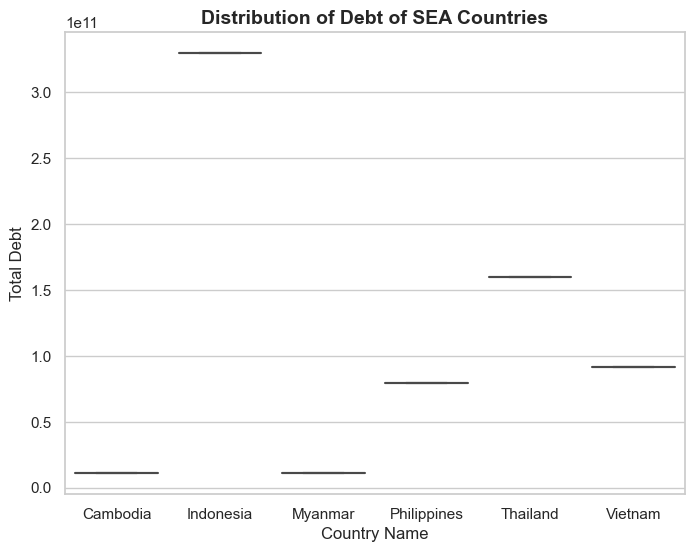

In [6]:
#average debt of each countries
country_ave_debt = sea_countries.groupby('Country Name')['Total Debt'].mean().reset_index()

#visualize distribution using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = country_ave_debt, x = 'Country Name', y = 'Total Debt')
plt.title('Distribution of Debt of SEA Countries', fontsize=14, fontweight='bold')
plt.show()

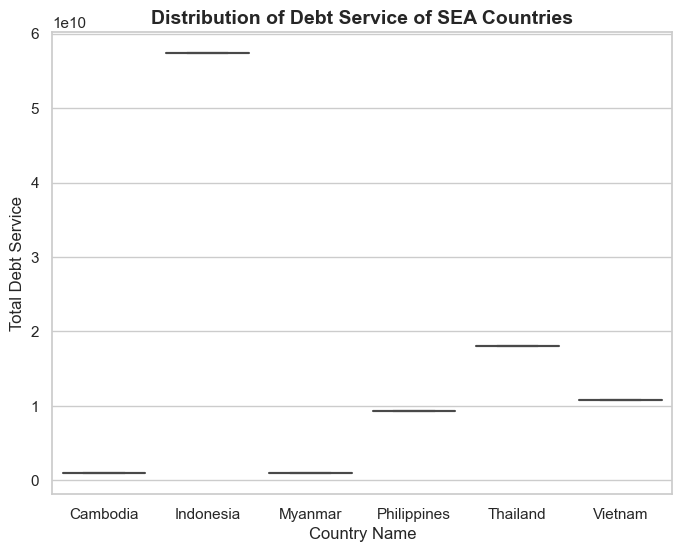

In [20]:
#average debt of each countries
country_ave_dserv = sea_countries.groupby('Country Name')['Total Debt Service'].mean().reset_index()

#visualize distribution using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = country_ave_dserv, x = 'Country Name', y = 'Total Debt Service')
plt.title('Distribution of Debt Service of SEA Countries', fontsize=14, fontweight='bold')
plt.show()

The boxplot above shows that there is a difference between the variation in the distribution of debt among each countries in the South East Asia. Indonesia, in particular, have the highest meadian value compared to the rest of South East Asian Countries and it also has the largest variation of debt. On the other hand, Myanmar have the smallest variation of debt. It can also be seen in the graph that there are outliers in the Philippines' data distribution.

### SEA Countries with the Highest and Lowest Average Debt <a class="anchor" id="section3_2"></a>

This section aims to answer the question:
    
    Which country in South East Asia has the highest average debt? Which has the lowest average debt?

First, the total average debt for each countries will be computed and then visualized using a bar chart. In addition, the average debt per year for each countries will also be computed and then visualized using a grouped bar chart.

In [7]:
#find the total average debt of each country
mean_debt = sea_countries.groupby('Country Name')['Total Debt'].mean().reset_index()
mean_debt_sorted = mean_debt.sort_values('Total Debt', ascending=False)
mean_debt_sorted

,Country Name,Total Debt
1,Indonesia,3.294480e+11
4,Thailand,1.597898e+11
5,Vietnam,9.150343e+10
3,Philippines,7.913347e+10
0,Cambodia,1.133887e+10
2,Myanmar,1.110742e+10


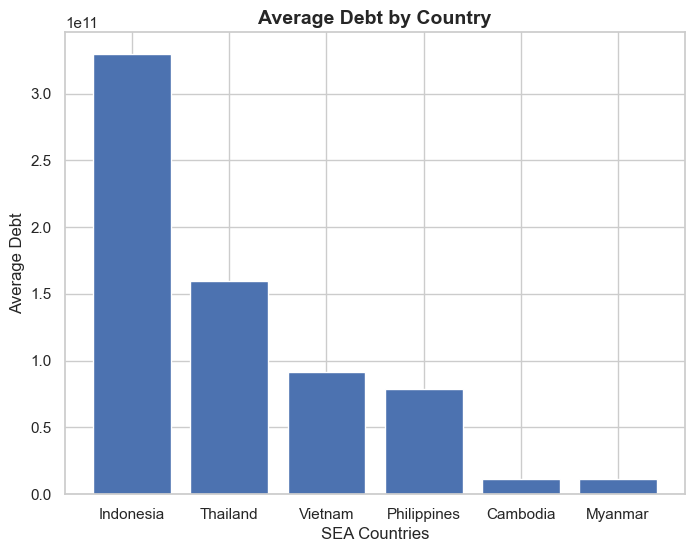

<Figure size 640x480 with 0 Axes>

In [8]:
#Compare the total average debt of SEA countries
plt.figure(figsize=(8,6))
plt.bar(mean_debt_sorted['Country Name'], mean_debt_sorted['Total Debt'])
plt.xlabel('SEA Countries')
plt.ylabel('Average Debt')
plt.title('Average Debt by Country', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

### 

### Average Debt Service of the SEA Countries


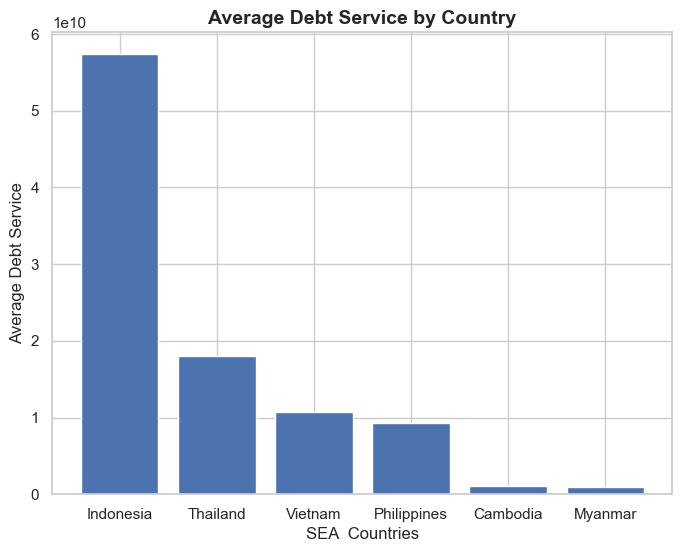

<Figure size 640x480 with 0 Axes>

In [9]:
mean_debt_service = sea_countries.groupby('Country Name')['Total Debt Service'].mean().reset_index()
mean_debt_service_sorted = mean_debt_service.sort_values('Total Debt Service', ascending=False)

#a plot of the average debt distribution
plt.figure(figsize=(8,6))
plt.bar(mean_debt_service_sorted['Country Name'], mean_debt_service_sorted['Total Debt Service'])
plt.xlabel('SEA  Countries')
plt.ylabel('Average Debt Service')
plt.title('Average Debt Service by Country', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

In [10]:
mean_debt_service_sorted

,Country Name,Total Debt Service
1,Indonesia,5.736429e+10
4,Thailand,1.799805e+10
5,Vietnam,1.076432e+10
3,Philippines,9.311426e+09
0,Cambodia,1.013879e+09
2,Myanmar,9.796826e+08


### Debt Outstanding vs Debt Service of Each Country per Year

In [11]:
mean_data = pd.merge(mean_debt_service_sorted, mean_debt_sorted, on='Country Name')
mean_data = mean_data.sort_values('Total Debt')
mean_data.set_index('Country Name', inplace=True)
mean_data

,Total Debt Service,Total Debt
Country Name,,
Myanmar,9.796826e+08,1.110742e+10
Cambodia,1.013879e+09,1.133887e+10
Philippines,9.311426e+09,7.913347e+10
Vietnam,1.076432e+10,9.150343e+10
Thailand,1.799805e+10,1.597898e+11
Indonesia,5.736429e+10,3.294480e+11


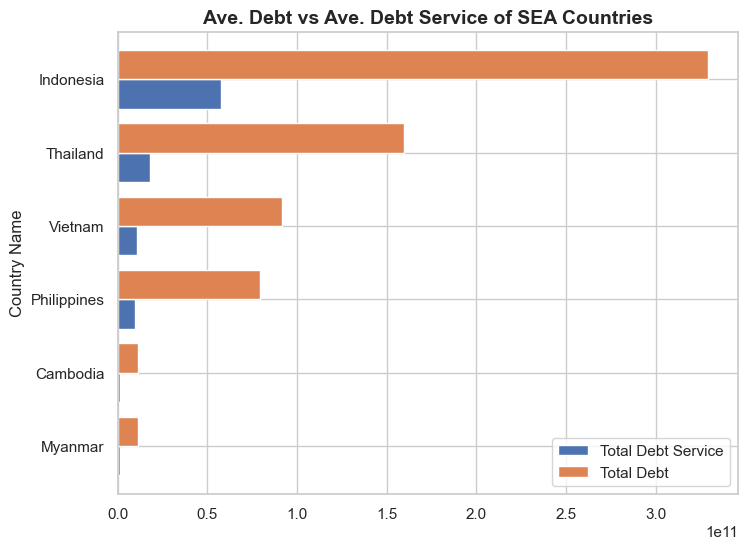

<Figure size 640x480 with 0 Axes>

In [12]:
ax = mean_data.plot(kind='barh', width=0.8, figsize=(8,6))
ax.set_title('Ave. Debt vs Ave. Debt Service of SEA Countries', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

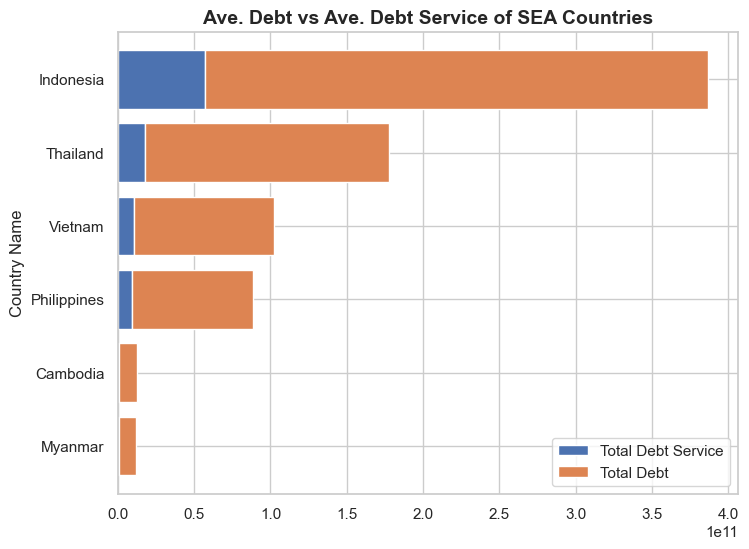

<Figure size 640x480 with 0 Axes>

In [13]:
#another graphical presentation
bottom= mean_data['Total Debt'] + mean_data['Total Debt Service']
ax = mean_data.plot(kind='barh', stacked=True, width=0.8, figsize=(8,6), bottom=bottom)
ax.set_title('Ave. Debt vs Ave. Debt Service of SEA Countries', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

Based on the graphs above, the average external debt is much higher compared to the average debt service for each countries. This could indicate that these countries have a high level of external debt relative to their ability to service that debt obligations.

### SEA Countries Total Debt for the years 2011 to 2021 <a class="anchor" id="section3_3"></a>

This section aims to answer the question:
    
    Did the total debt of each countries in South East Asia increase within the decade?
    
To answer this question, the debts incurred by the countries within a given year will be added and stored in a new variable. Then the trend will be visualized using line graphs.

In [14]:
tenyr_trend = sea_countries[['Country Name', 'Year','Total Debt', 'Total Debt Service']]
tenyr_trend.head()

Series Code,Country Name,Year,Total Debt,Total Debt Service
0,Cambodia,2011,4.655288e+09,321443646.8
1,Cambodia,2012,6.749243e+09,547347874.6
2,Cambodia,2013,7.619394e+09,617669078.9
3,Cambodia,2014,8.318518e+09,660620733.6
4,Cambodia,2015,9.436048e+09,691057522.3


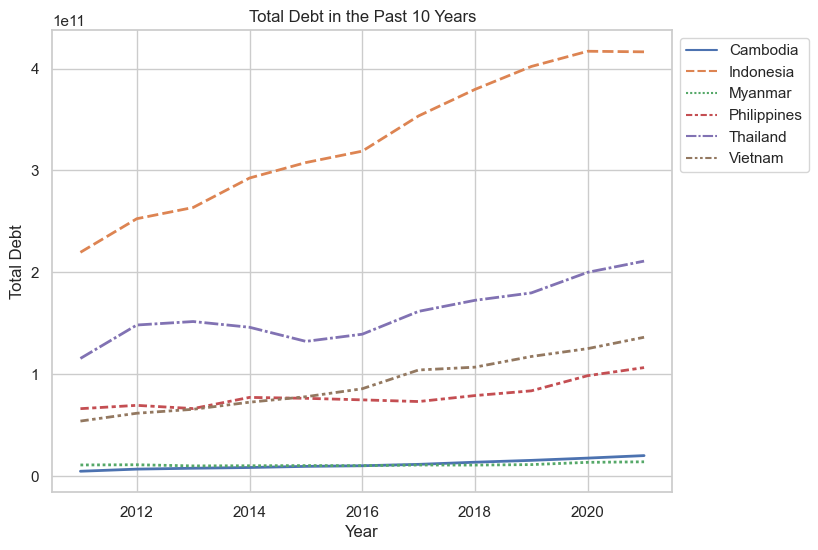

In [15]:
#debt trend of SEA countries
plt.figure(figsize=(8,6))
sns.lineplot(data = tenyr_trend, x='Year', y='Total Debt', hue = 'Country Name', style = 'Country Name', linewidth=2)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Total Debt in the Past 10 Years')
plt.show()

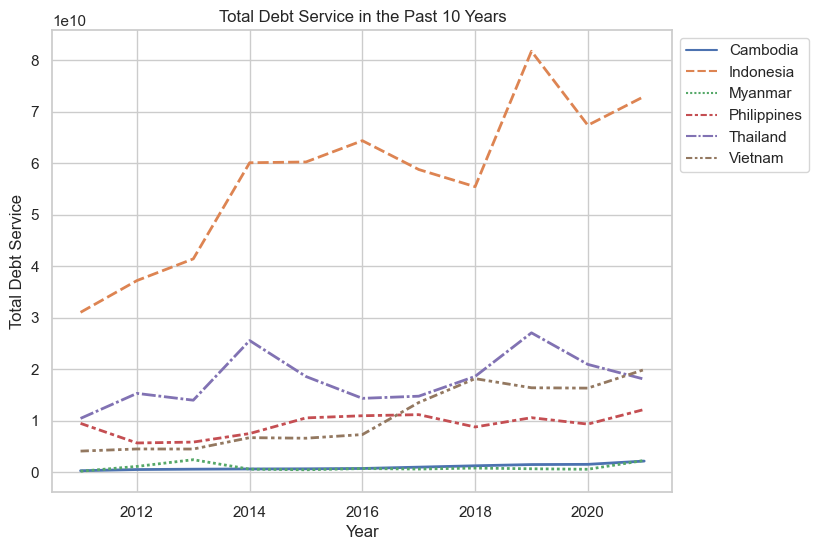

In [16]:
#debt service trend of SEA countries
plt.figure(figsize=(8,6))
sns.lineplot(data = tenyr_trend, x='Year', y='Total Debt Service', hue = 'Country Name', style = 'Country Name', linewidth=2)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Total Debt Service in the Past 10 Years')
plt.show()

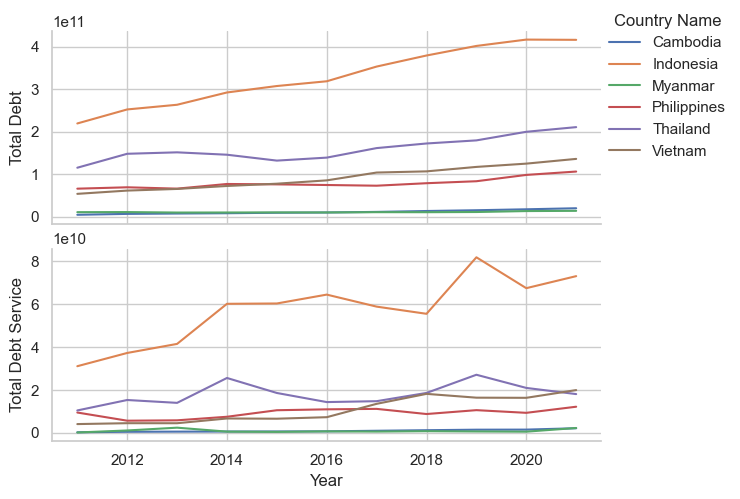

In [17]:
#this will plot the two lineplots above for easier comparison
x =['Year']
y=['Total Debt', 'Total Debt Service']
g = sns.PairGrid(sea_countries, hue='Country Name', x_vars=x, y_vars=y, aspect=2.5)
g.map(sns.lineplot)
g.tight_layout()
g.add_legend(loc = 'upper right')

The graphs above shows that the external debts of most of the countries in South East Asia were increasing over the years, except for Cambodia and Myanmar, which maintained a relatively stable level of external debt over the past 10 years.

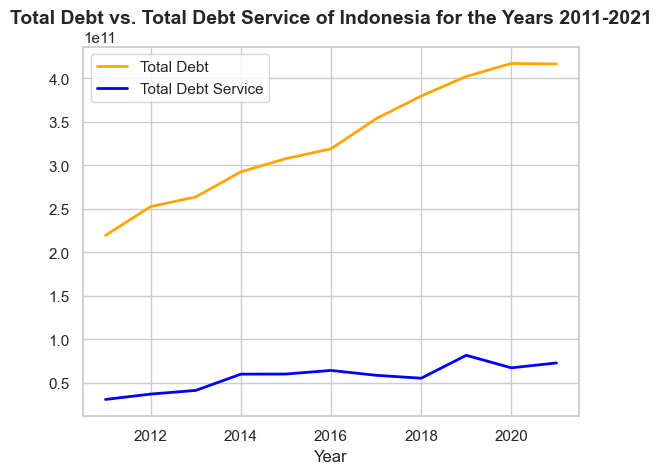

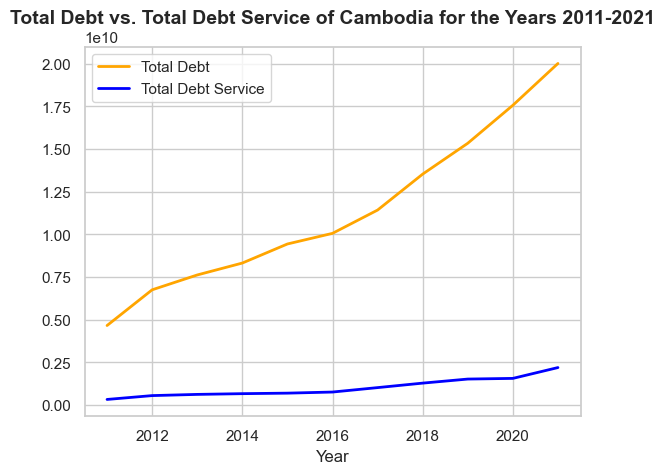

In [18]:
#function that would return total debt and total debt service of a specific country
def debt_vs_debtserv(y1, y2, country, df):
    # filter dataframe by country
    country_df = df[df['Country Name'] == country]
    
    # create lineplots for total debt and total debt service
    fig, ax = plt.subplots()
    ax.plot(country_df['Year'], country_df[y1], label='Total Debt', linewidth=2, color='orange')
    ax.plot(country_df['Year'], country_df[y2], label='Total Debt Service', linewidth=2, color='blue')
    ax.set_xlabel('Year')
    ax.set_title('Total Debt vs. Total Debt Service of {} for the Years 2011-2021'.format(country), fontsize=14, fontweight='bold')
    ax.legend()
    plt.show()

#call function and save into variable
indonesia = debt_vs_debtserv('Total Debt', 'Total Debt Service', 'Indonesia', sea_countries)
cambodia = debt_vs_debtserv('Total Debt', 'Total Debt Service', 'Cambodia', sea_countries)

## Conclusion <a class="anchor" id="conclusion"></a>
The analysis showed that the data distribution of the countries in South East Asia are different from each other. Among these countries, Indonesia has the highest external debt while Cambodia has the lowest external debt. Lastly, the analysis showed that the debt of each country increased for the past 10 years, except for Cambodia and Myanmar, which maintained a relatively stable level of debt.